In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [2]:
all_datafiles = pd.read_excel('FINAL_OUTPUT_COLLISION.xlsx')

In [6]:
parameters = {'tau':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'sigmaerror':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'sigmagap':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'lcCooperative':[-0.6, -0.7, -0.8, -0.9, -1.0], 'collisionMinGapFactor':[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]}
# Open the log file
base_path = '/Users/sindhujach/Desktop/ECE_699/Traffic_simulation/Weeklytask-12-10-23/simulation_outputs/'

In [7]:
results = {}  # Dictionary to store results for each parameter-value combination.

for param_name, values in parameters.items():
    for value in values:
        total_collisions = 0
        for run in range(1,6):  # Assuming you ran each parameter-value combo 5 times
            file_path = base_path + f"output_{param_name}={value}_run_{run}.xml"
            tree = ET.parse(file_path)
            root = tree.getroot()
            total_collisions += len(root.findall('collision'))
        if param_name not in results:
            results[param_name] = {}
        results[param_name][value] = total_collisions / 5  # Store the average collisions


In [8]:
variances = {}

for param_name, values in parameters.items():
    variances[param_name] = {}
    for value in values:
        collision_list = []
        for run in range(1,6):  # Assuming you ran each parameter-value combo 5 times
            file_path = base_path + f"output_{param_name}={value}_run_{run}.xml"
            tree = ET.parse(file_path)
            root = tree.getroot()
            collision_list.append(len(root.findall('collision')))
        mean = sum(collision_list) / 5
        variance = sum((x - mean) ** 2 for x in collision_list) / 4  # N-1 for sample variance
        variances[param_name][value] = variance


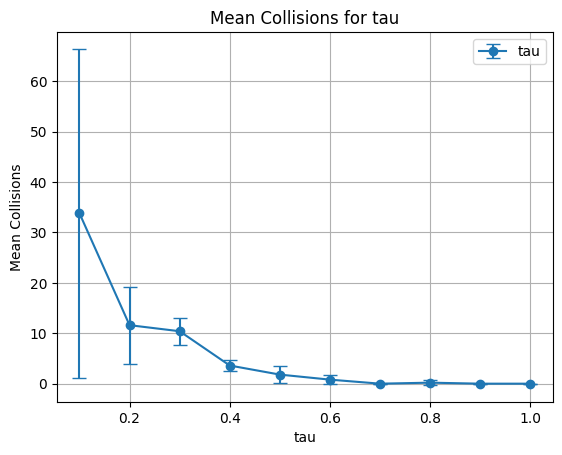

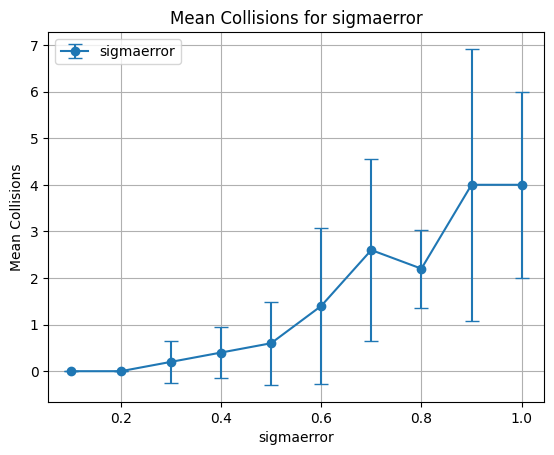

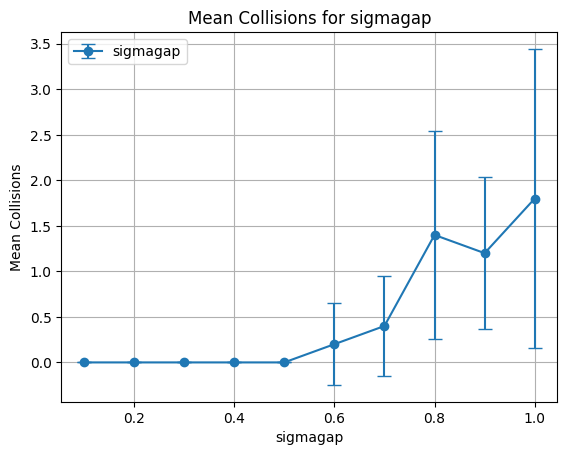

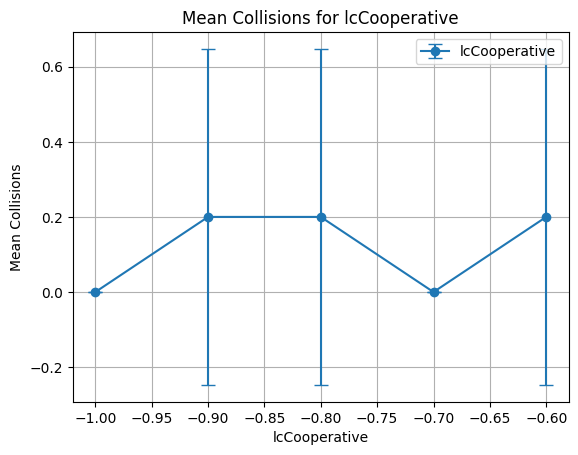

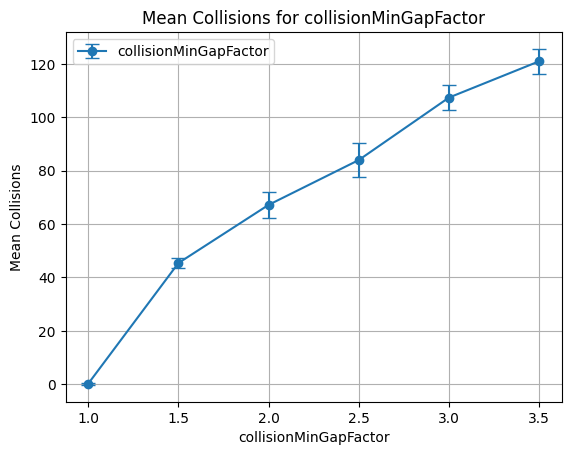

In [9]:
for param_name, values in parameters.items():
    x = list(values)
    y = [results[param_name][v] for v in values]
    yerr = [variances[param_name][v] ** 0.5 for v in values]  # Standard deviation as error bars
    plt.errorbar(x, y, yerr=yerr, label=param_name, fmt='-o', capsize=5)  # Use errorbar for mean and std dev
    plt.title(f"Mean Collisions for {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Mean Collisions")
    plt.grid(True)
    plt.legend()
    plt.show()

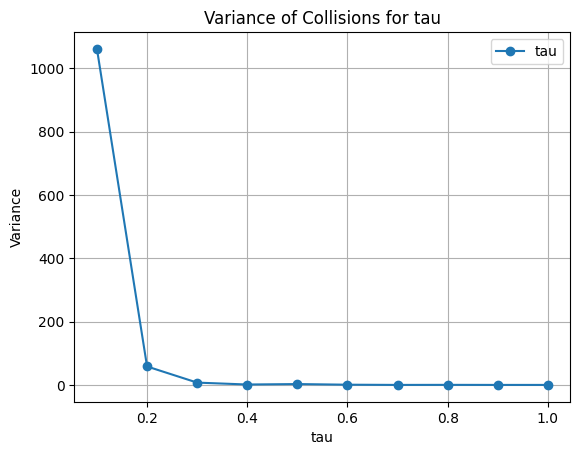

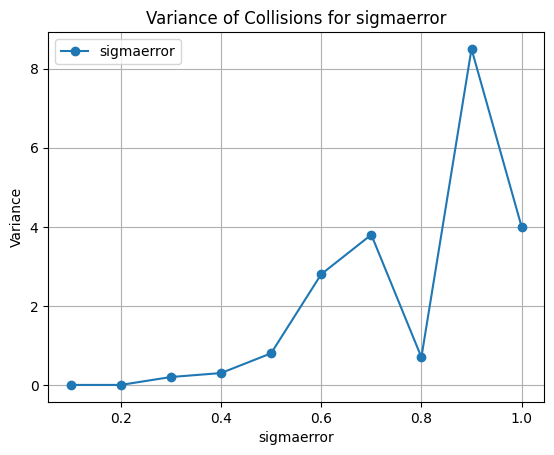

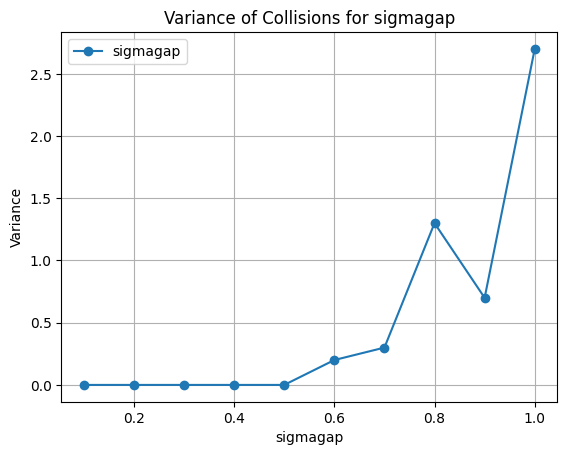

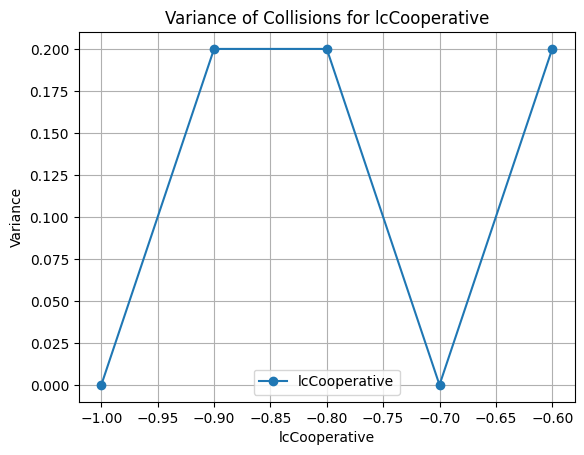

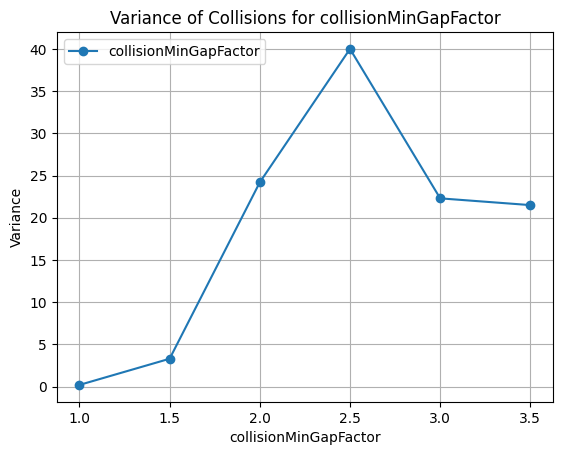

In [10]:
for param_name, values in parameters.items():
    x = list(values)
    y = [variances[param_name][v] for v in values]
    plt.plot(x, y, '-o', label=param_name)
    plt.title(f"Variance of Collisions for {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Variance")
    plt.grid(True)
    plt.legend()
    plt.show()

In [11]:
data_for_boxplot = {}

# Preparing data for box plot
for param_name, values in parameters.items():
    data_for_boxplot[param_name] = {}
    for value in values:
        collision_list = []
        for run in range(1,6):  # Assuming you ran each parameter-value combo 5 times
            file_path = base_path + f"output_{param_name}={value}_run_{run}.xml"
            tree = ET.parse(file_path)
            root = tree.getroot()
            collision_list.append(len(root.findall('collision')))
        data_for_boxplot[param_name][value] = collision_list


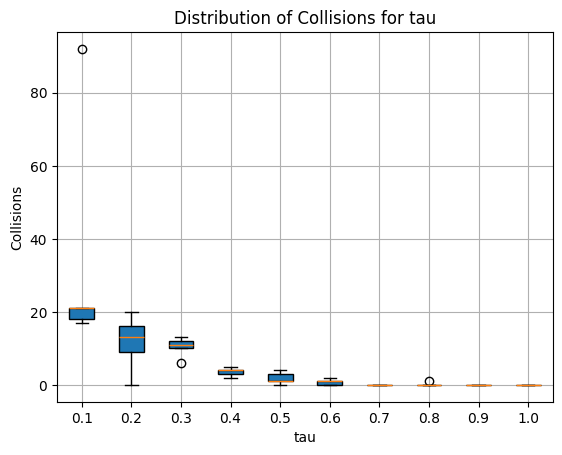

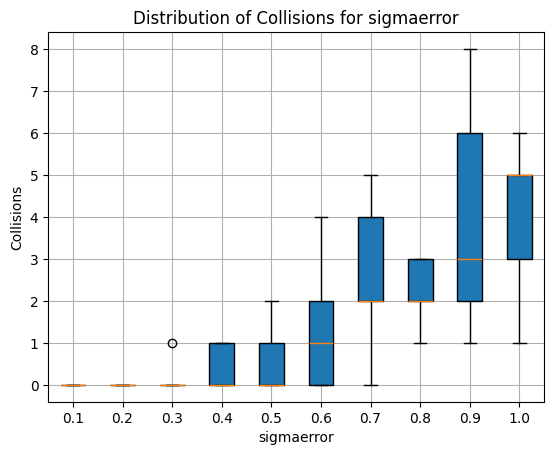

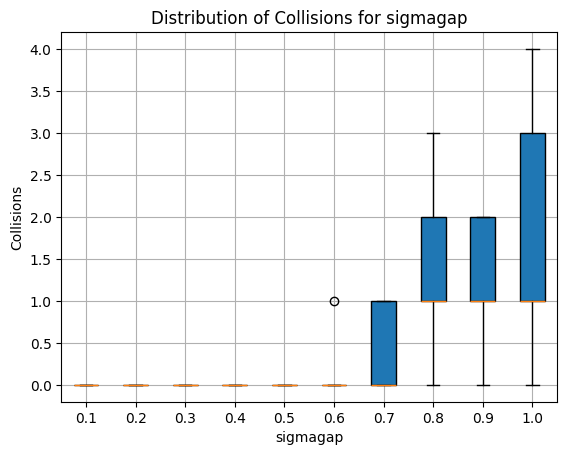

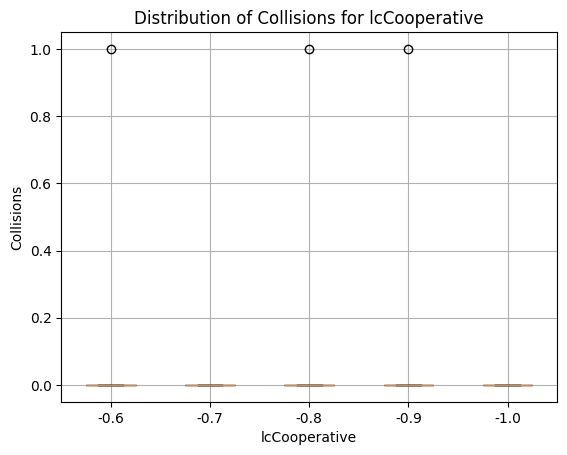

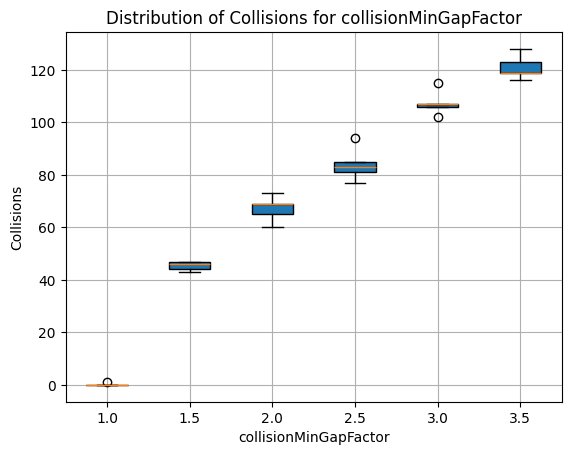

In [12]:
# Plotting box plot
for param_name, values in parameters.items():
    data = [data_for_boxplot[param_name][v] for v in values]
    plt.boxplot(data, vert=True, patch_artist=True, labels=values)
    plt.title(f"Distribution of Collisions for {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Collisions")
    plt.grid(True)
    plt.show()

In [13]:
data_for_histogram = {}

# Preparing data for histogram
for param_name, values in parameters.items():
    data_for_histogram[param_name] = {}
    for value in values:
        collision_list = []
        for run in range(1,6):  # Assuming you ran each parameter-value combo 5 times
            file_path = base_path + f"output_{param_name}={value}_run_{run}.xml"
            tree = ET.parse(file_path)
            root = tree.getroot()
            collision_list.append(len(root.findall('collision')))
        data_for_histogram[param_name][value] = collision_list
